In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr
from sklearn.metrics import matthews_corrcoef
from sklearn.feature_selection import mutual_info_regression

In [59]:
df1=pd.read_csv("/data/house_prices.csv")
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [49]:
df1_corr=df1[['LotArea','SalePrice','YearBuilt']]
corr_matrix1=df1_corr.corr()
print(corr_matrix1)

            LotArea  SalePrice  YearBuilt
LotArea    1.000000   0.263843   0.014228
SalePrice  0.263843   1.000000   0.522897
YearBuilt  0.014228   0.522897   1.000000


In [50]:
df2=pd.read_csv("/data/Titanic.csv")
df2['Sex']=df2['Sex'].map({'male':0,'female':1})
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df2_corr=df2[['Pclass','Survived','Sex']]
corr_matrix2=df2_corr.corr()
print(corr_matrix2)

            Pclass  Survived       Sex
Pclass    1.000000 -0.338481 -0.131900
Survived -0.338481  1.000000  0.543351
Sex      -0.131900  0.543351  1.000000


<h1><em>Heatmap of correlation</em></h1>

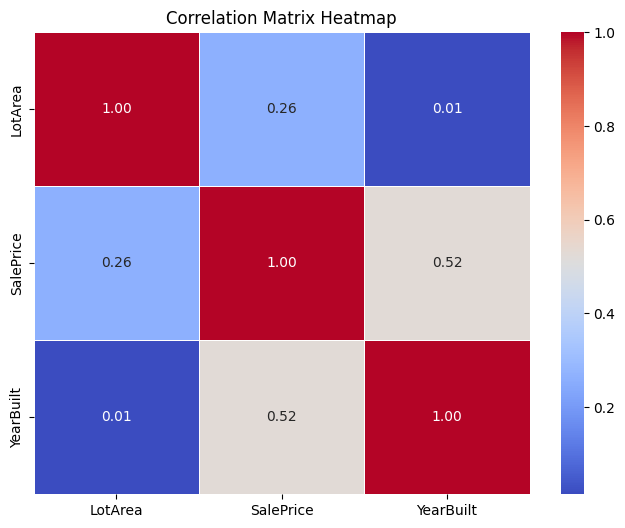

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix1, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


<h1><em>Pearson's Correlation</em></h1>

<h3>Measures linear relationship between two continuous variables.<br><br>Range:-1 to 1</h3>

In [53]:
corr_pearson = df1_corr.corr(method='pearson')
corr_pearson

,LotArea,SalePrice,YearBuilt
LotArea,1.000000,0.263843,0.014228
SalePrice,0.263843,1.000000,0.522897
YearBuilt,0.014228,0.522897,1.000000


<h1><em>Spearman's Rank Correlation</em></h1>

<h3>Measures the monotonic relationship between two variables. Useful when the data isn't normally distributed or the relationship isn't linear.<br><br>Data should be at least ordinal.</h3>

In [54]:
corr_spearman = df2_corr.corr(method='spearman')
corr_spearman

,Pclass,Survived,Sex
Pclass,1.000000,-0.339668,-0.135775
Survived,-0.339668,1.000000,0.543351
Sex,-0.135775,0.543351,1.000000


<h1><em>Point-Biserial Correlation</em></h1>

<h3>Measures the relationship between a continuous variable and a binary variable.<br><br>The closer r is to ±1, the stronger the linear relationship.<br>
* 0 to ±0.3: Weak correlation.<br>
* ±0.3 to ±0.7: Moderate correlation.<br>
* ±0.7 to ±1: Strong correlation.<br><br>
p-value: This tells you whether the observed correlation is statistically significant.<br>
* Low p-value (&lt 0.05): The correlation is statistically significant, meaning there is evidence to suggest that the correlation observed is not due to random chance.<br>
* High p-value (&gt 0.05): The correlation is not statistically significant, implying that the relationship could be due to chance.
</h3>

In [55]:
r, p_value = pointbiserialr(df2['Survived'], df2['Fare'])
print(r,p_value)

0.2573065223849624 6.120189341924608e-15


<h1><em>Phi Coefficient (Φ)</em></h1>

<h3>Measures the association between two binary variables.
<br><br>
Closer to ±1: High Positive/Negative Correlation</h3>

In [56]:
phi_coefficient = matthews_corrcoef(df2['Sex'], df2['Survived'])
print(phi_coefficient)

0.5433513806577551


<h1><em>Mutual Information</em></h1>

<h3>Measures the mutual dependence between two variables. It can capture non-linear relationships.</h3>

In [57]:
mi = mutual_info_regression(df1[['LotArea','YearBuilt']], df1['SalePrice'])
print(mi)

[0.09158151 0.27214973]
